# Libraries

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# our defined functions for data preparation
import utils.functions as ft

# setting option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Load Data

In [2]:
ins_raw = pd.read_csv('Data/dseb63_installments_payments.csv')
ins_raw = ins_raw[['SK_ID_CURR']+list(ins_raw.columns[:-1])]
print("Tnstallments payemnts dataset shape:", ins_raw.shape)
ins_raw.head()

Tnstallments payemnts dataset shape: (7744758, 8)


,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,147397.00000,1054186,1.00000,6,-1180.00000,-1187.00000,6948.36000,6948.36000
1,147397.00000,2452854,1.00000,21,-546.00000,-552.00000,11302.60500,11302.60500
2,147397.00000,1054186,1.00000,2,-1300.00000,-1307.00000,6948.36000,6948.36000
3,147397.00000,1682318,1.00000,2,-240.00000,-243.00000,7374.51000,7374.51000
4,147397.00000,2452854,1.00000,10,-876.00000,-882.00000,11302.60500,11302.60500


In [3]:
# file contains only SK_ID_CURR and TARGET from train_test (defined in DP_TRAIN_TEST notebook)
id_target = pd.read_csv("Data/dseb63_id_target.csv", index_col=0)
id_target.head()

,SK_ID_CURR,TARGET
0,278621,0.00000
1,139008,0.00000
2,138348,0.00000
3,64140,0.00000
4,219374,0.00000


__1. Data Explore__

In [4]:
ins = ins_raw.copy()

In [5]:
ft.data_explore(ins)

,info
Rows,7744758
Features,8
Duplicate Rows,0
float64,6
int64,2


In [6]:
ft.check_nan(ins)

,nan,%nan
DAYS_ENTRY_PAYMENT,1639,0.02116
AMT_PAYMENT,1639,0.02116
SK_ID_CURR,1,0.00001
AMT_INSTALMENT,1,0.00001


__COMMENTS__
* `SK_ID_CURR` is the main key that will be used for the final purpose, so the records that do not contain `SK_ID_CURR` will not work for us and we need to remove them

In [7]:
# remove records without SK_ID_CURR
ins.dropna(subset='SK_ID_CURR', inplace = True)

In [8]:
ft.multi_features_explore(ins)

index,dtype,nonnull,%nonnull,nan,%nan,nunique,nunique_nan,max,min,mean,std
SK_ID_CURR,float64,7744757,1.00000,0,0.00000,180733,180733,307508.00000,0.00000,153573.94813,88642.67010
SK_ID_PREV,int64,7744757,1.00000,0,0.00000,549020,549020,2843495,1000001,1902824.20701,536057.01439
NUM_INSTALMENT_VERSION,float64,7744757,1.00000,0,0.00000,54,54,178.00000,0.00000,0.82546,0.97750
NUM_INSTALMENT_NUMBER,int64,7744757,1.00000,0,0.00000,274,274,275,1,19.91674,27.63187
DAYS_INSTALMENT,float64,7744757,1.00000,0,0.00000,2921,2921,-2.00000,-2922.00000,-1055.68146,800.97125
DAYS_ENTRY_PAYMENT,float64,7743119,1.00000,1638,0.00000,3028,3029,-2.00000,-3160.00000,-1064.30347,800.62320
AMT_INSTALMENT,float64,7744757,1.00000,0,0.00000,669946,669946,3771487.84500,0.00000,16724.75620,49977.45680
AMT_PAYMENT,float64,7743119,1.00000,1638,0.00000,717849,717850,3771487.84500,0.00000,16853.89120,54076.02377


__COMMENTS__
* All features in this dataset are numerical features.

__2. Check correlation__

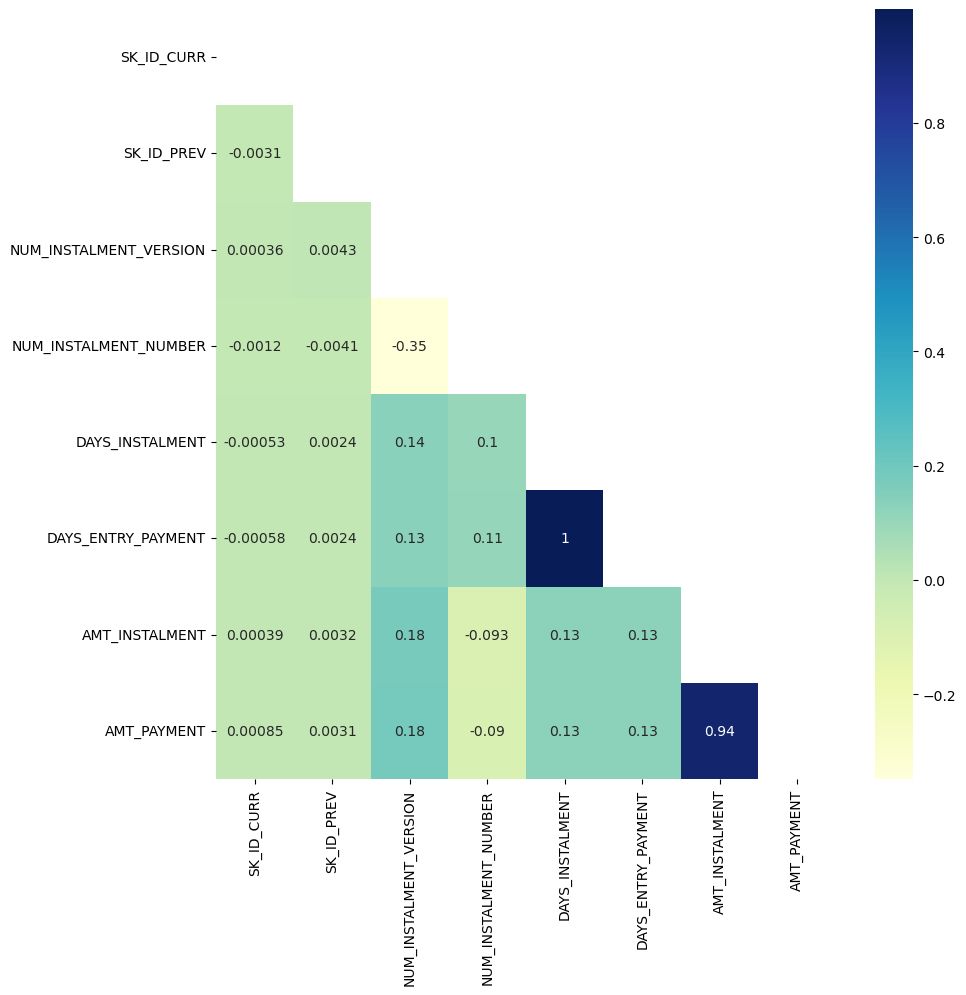

In [9]:
ft.check_corr(ins, heatmap=True, figsize=(10, 10))

__COMMENTS__
* As we can see, `AMT_INSTALMENT` and `AMT_PAYMENT` have very strong correlation with each other (about 0.94), which might result in the same effect they have on `TARGET`. Hence, we could keep only one of them and we will choose to keep `AMT_PAYMENT`.
* Same with `DAYS_INSTALMENT` and `DAYS_ENTRY_PAYMENT`, due to their high correlation, we will just keep `DAYS_ENTRY_PAYMENT`.

In [10]:
ins.drop(columns = ['AMT_INSTALMENT', 'DAYS_INSTALMENT'], inplace = True)

__3. Check outlier using boxplot__

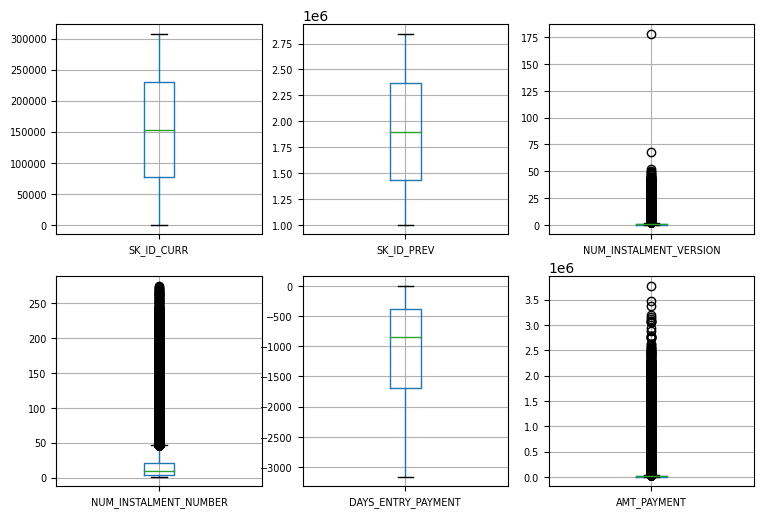

In [11]:
ft.num_dist_boxplot(data=ins, nrows=2, ncols=3, figsize=(9, 6), fontsize=7)

__4. Dealing with numerical features__

In [12]:
ins_group = ft.sub_num_agg(ins, 'SK_ID_CURR', 'INST')
ins_group.head()

,SK_ID_CURR,INST_NUM_INSTALMENT_VERSION_min,INST_NUM_INSTALMENT_VERSION_max,INST_NUM_INSTALMENT_VERSION_mean,INST_NUM_INSTALMENT_VERSION_sum,INST_NUM_INSTALMENT_NUMBER_min,INST_NUM_INSTALMENT_NUMBER_max,INST_NUM_INSTALMENT_NUMBER_mean,INST_NUM_INSTALMENT_NUMBER_sum,INST_DAYS_ENTRY_PAYMENT_min,INST_DAYS_ENTRY_PAYMENT_max,INST_DAYS_ENTRY_PAYMENT_mean,INST_DAYS_ENTRY_PAYMENT_sum,INST_AMT_PAYMENT_min,INST_AMT_PAYMENT_max,INST_AMT_PAYMENT_mean,INST_AMT_PAYMENT_sum
0,0.00000,0.00000,2.00000,0.43333,13.00000,1,21,7.86667,236,-446.00000,-5.00000,-150.43333,-4513.00000,141.57000,100287.76500,10364.74650,310942.39500
1,1.00000,0.00000,2.00000,0.70000,28.00000,1,13,6.10000,244,-1596.00000,-18.00000,-622.05000,-24882.00000,120.78000,361186.42500,19684.16438,787366.57500
2,3.00000,0.00000,4.00000,0.41860,18.00000,1,31,12.20930,525,-713.00000,-5.00000,-228.23256,-9814.00000,78.43500,43050.28500,5895.38616,253501.60500
3,4.00000,1.00000,1.00000,1.00000,6.00000,1,6,3.50000,21,-2374.00000,-2230.00000,-2299.16667,-13795.00000,8933.98500,8957.43000,8953.52250,53721.13500
4,5.00000,1.00000,1.00000,1.00000,10.00000,1,10,5.50000,55,-2083.00000,-1808.00000,-1944.20000,-19442.00000,9799.65000,9820.75500,9818.64450,98186.44500


__5. Merging with ID and TARGET from training dataset to see more insight__

In [13]:
id_target_train = id_target[id_target['TARGET'].notnull()]
ins_insight = id_target_train.merge(ins_group, on='SK_ID_CURR', how='left')

In [14]:
ins_insight.shape

(246009, 18)

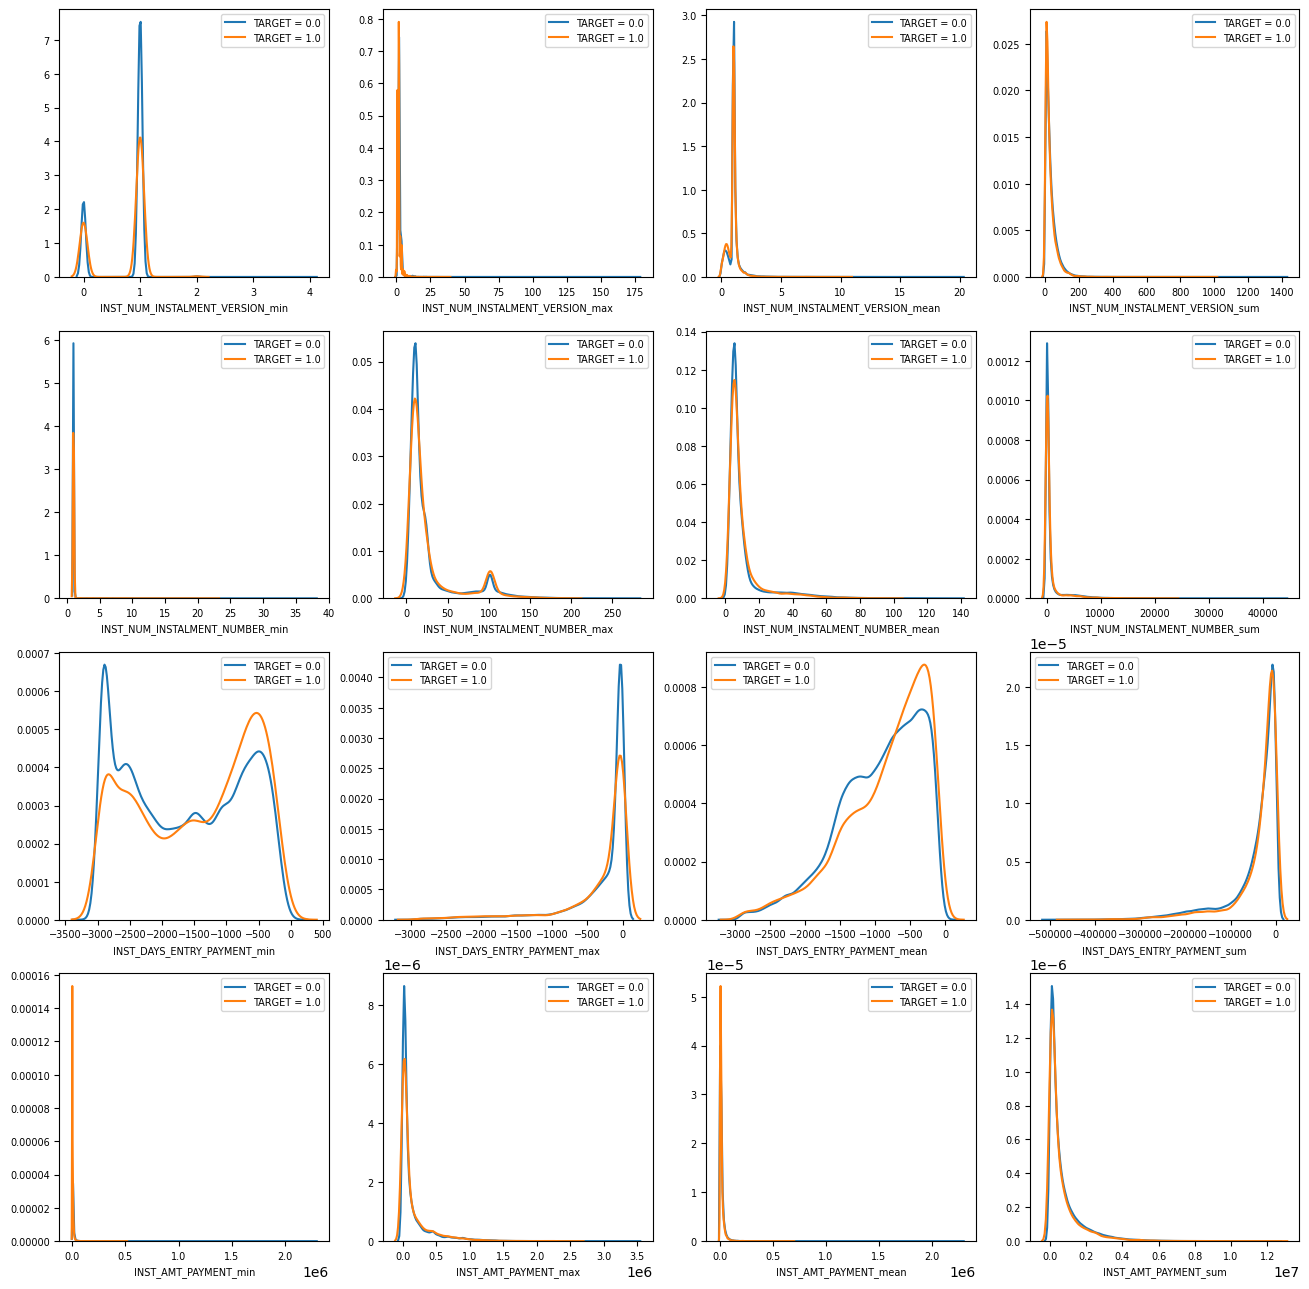

In [15]:
ft.num_kdeplot(data=ins_insight.iloc[:, 1:], cols=list(ins_insight.iloc[:, 2:].columns), color='TARGET',
               nrows=4, ncols=4, figsize=(16, 16), fontsize=7)

__COMMENTS__
* As we can see, the distribution of two classes 0 and 1 of `INST_DAYS_ENTRY_PAYMENT_min` show a different pattern at the point of about `-1300` and the distribution of two classes 0 and 1 of `INST_DAYS_ENTRY_PAYMENT_mean` show a different pattern at the point of about `-750`. So we will create two new features to capture them.

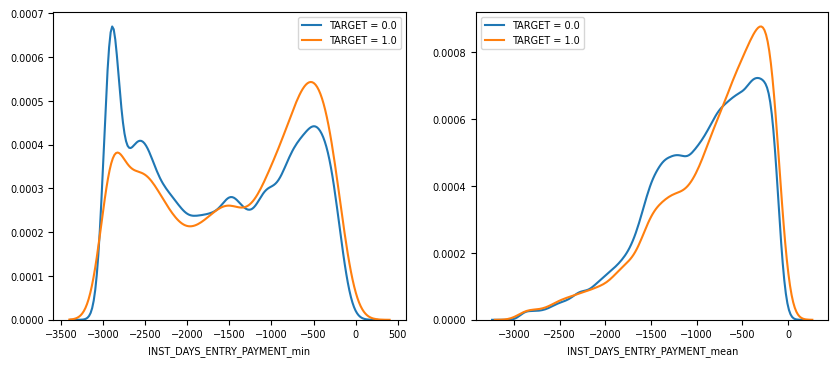

In [16]:
ft.num_kdeplot(data=ins_insight[['TARGET', 'INST_DAYS_ENTRY_PAYMENT_min', 'INST_DAYS_ENTRY_PAYMENT_mean']],
               cols=['INST_DAYS_ENTRY_PAYMENT_min', 'INST_DAYS_ENTRY_PAYMENT_mean'], color='TARGET',
               nrows=1, ncols=2, figsize=(10, 4), fontsize=7)

In [17]:
ins_group['INST_FLAG_DAYS_ENTRY_PAYMENT_min_spe'] = ins_group['INST_DAYS_ENTRY_PAYMENT_min'].apply(lambda x: 1 if x < -1300 else 0)
ins_group['INST_FLAG_DAYS_ENTRY_PAYMENT_mean_spe'] = ins_group['INST_DAYS_ENTRY_PAYMENT_mean'].apply(lambda x: 1 if x < -750 else 0)

__6. Scaling Data__

In [18]:
ins_scaled = ins_group.copy()
ins_scaled.iloc[:, 2:] = ft.scale_df_full(ins_scaled.iloc[:, 2:], method='standard')

__7. Filling missing values__

In [19]:
# merge with SK_ID_CURR and TARGET of the train/test to fillna in the whole set
ins_final = id_target.merge(ins_scaled, on='SK_ID_CURR', how='left')

In [20]:
# Fillna with 0
ins_final.iloc[:, 2:] = ft.fillna(ins_final.iloc[:, 2:], 'constant', 0)

__8. Saving files__

In [21]:
ins_final.to_csv("prepared_files/dp_install.csv")